In [804]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit import BasicAer 

In [805]:
n=5
grover_circuit = QuantumCircuit(n)

In [806]:
def apply_h_gate(qc, qubits):
    for q in qubits:
        qc.h(q)
    return qc

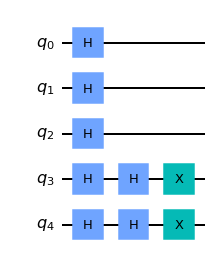

In [807]:
grover_circuit = apply_h_gate(grover_circuit, [0,1,2,3,4])
grover_circuit.h(3)
grover_circuit.h(4)
grover_circuit.x(3)
grover_circuit.x(4)
grover_circuit.draw('mpl')

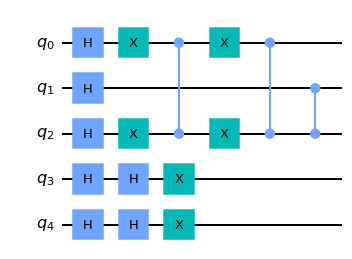

In [808]:
grover_circuit.x(0)
grover_circuit.x(2)

grover_circuit.cz(0,2)


grover_circuit.x(0)
grover_circuit.x(2)

grover_circuit.cz(0,2)
grover_circuit.cz(1,2) 


grover_circuit.draw('mpl')

In [809]:
#diffuser

def diffuser(n):
    diffuser_circuit = QuantumCircuit(n)
    for q in range(n):
        diffuser_circuit.h(q)
    
    for q in range(n):
        diffuser_circuit.x(q)
        
    diffuser_circuit.h(n-1)
    diffuser_circuit.mct(list(range(n-1)), n-1) 
    diffuser_circuit.h(n-1)
    
    for q in range(n):
        diffuser_circuit.x(q)
    
    for q in range(n):
        diffuser_circuit.h(q)
    
    U_s = diffuser_circuit.to_gate()
    U_s.name = "U$_s$"
    
    return U_s

In [810]:
grover_circuit.append(diffuser(3), [0,1,2])

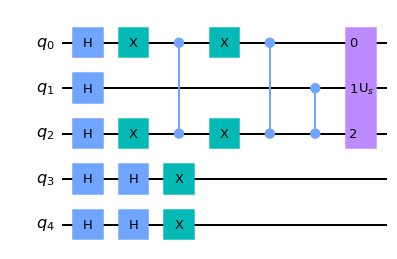

In [811]:
grover_circuit.draw('mpl')

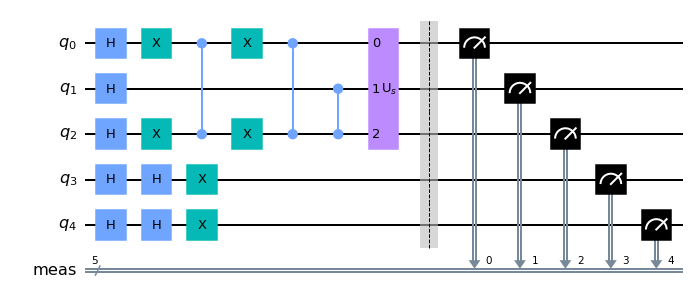

In [812]:
grover_circuit.measure_all()
grover_circuit.draw('mpl')

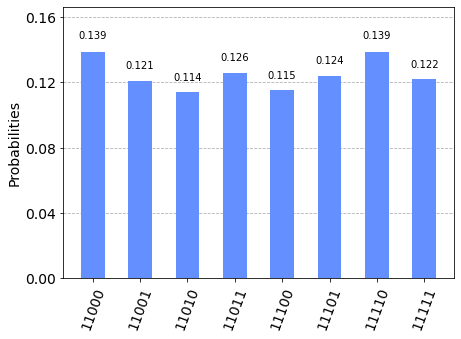

In [813]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)